# 10 Minutes to Blaze 

This is a short introduction to Blaze for new users. Knowledge of Python and certain data types (CSV, SQL) is assumed. 

# Data Input and Output

Data used in this section can be found [here](https://github.com/Will-So/blaze_data). To use the data, download the datasets to a directory of your choice and then  The interface for reading different data types is consistent. With all data stores, we use the `Data` object to load the data. 

In [35]:
DATA_DIR = '/Users/Will/Data/blaze_data/' #Set to our data directory 

We refer to the data resource being used (e.g., SQL, CSV) as the **backend** throughout the tutorial. 

## Reading from a CSV

In [36]:
from blaze import Data

In [37]:
iris = Data(DATA_DIR + 'iris.csv')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Reading from an SQL Database

All data sources supported by Blaze can be explored by wrapping the `Data` constructor around it. 

For SQL databases for example, we just use the `URI`. In Windows the SQLite URI will look like this: `'sqlite:///'C:\\Users\\Username\\Data\\lahman2013.sqlite`

The URI below works with Linux and OS X. 

In [4]:
db = Data('sqlite:////' + DATA_DIR + 'lahman2013.sqlite')

We can use the `fields` attribute to look at a list of the tables in the database. Note that with Ipython we can also type `db.<TAB>` to see all the tables. Alternatively, simply print `db.fields` to view all the tables.

In [5]:
print(db.fields)

['AllstarFull', 'Appearances', 'AwardsManagers', 'AwardsPlayers', 'AwardsShareManagers', 'AwardsSharePlayers', 'Batting', 'BattingPost', 'Fielding', 'FieldingOF', 'FieldingPost', 'HallOfFame', 'Managers', 'ManagersHalf', 'Master', 'Pitching', 'PitchingPost', 'Salaries', 'Schools', 'SchoolsPlayers', 'SeriesPost', 'Teams', 'TeamsFranchises', 'TeamsHalf', 'temp']


In [6]:
df = db.Batting
df.head(3)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
1,aardsda01,2006,1,CHN,NL,45,43,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,45
2,aardsda01,2007,1,CHA,AL,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


## Reading from HDF5

First we take a look at the `File Object` of the HDF5 files. 

In [7]:
Data(DATA_DIR + 'sample.hdf5').fields

['info', 'points', 'z']

So now we see that there are three different datasets in the file. We pick the one we are interested in, `z`:

In [8]:
hdfs_df = Data(DATA_DIR + 'sample.hdf5::/z')
hdfs_df[:2]

,z
0,0.628902
1,0.797281


Dealing with HDF5 files is somewhat more complex than most types of files. More details for dealing with HDF5 files can be found [here](https://odo.readthedocs.org/en/latest/hdf5.html). 

## Reading Other Files 

Most other supported backends can be loaded in the same way that we load HDF5 and SQL. A notable exception is Spark. If you need to use Spark with Blaze, the documentation [here](http://odo.readthedocs.org/en/latest/spark.html) provides an excellent walkthrough.

As of version 0.8, supported backends include AWS S3, CSV, JSON, HDF5, Hadoop File System (HFS), Hive, Mongo, Spark/SQL, SAS, SQL, and SSH. 

## Converting Data

The Blaze ecosystem also makes it to save data into new formats. The folliwng converts our SQL Database into a Pandas Dataframe in just one line of code using `odo`:

In [9]:
from blaze import odo
import pandas as pd

pandas_df = odo(df, pd.DataFrame)
type(pandas_df)

pandas.core.frame.DataFrame

# Interactive Expressions

For the rest of the tutorial, we will explore data interactively with the `Data` constructor. As shown previously, we can wrap any data source supported by Blaze into interactive expressions. Note that not all operations are possible for all backends.  

In [10]:
df = Data(pandas_df)
type(df)

blaze.interactive.InteractiveSymbol

# Viewing Data 

View the top `n` rows of a dataset with `head(n)`:

In [11]:
df.head(5)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
1,aardsda01,2006,1,CHN,NL,45,43,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,45
2,aardsda01,2007,1,CHA,AL,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,aardsda01,2008,1,BOS,AL,47,5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5
4,aardsda01,2009,1,SEA,AL,73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


By default, Blaze shows us 10 rows of data. We can alter this behavior with the basic slicing notation `[start:stop:step]`.

In [12]:
df[1000:1006:2]

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
1000,allench01,2000,1,MIN,AL,15,15,50,2,15,3,0,0,7,0,2,3,14,0,1,0,1,1,15
1002,allench01,2002,1,CLE,AL,5,5,10,0,1,1,0,0,0,0,0,0,2,0,0,1,0,1,5
1004,allench01,2004,1,TEX,AL,20,20,58,4,14,4,1,0,6,0,1,2,13,0,0,2,1,1,20


We can select a single column using either df[`'column_name'`] or df.`column_name`. The former allows us to select multiple columns at once by using a list:

In [13]:
df['teamID'].head(3)

,teamID
0,SFN
1,CHN
2,CHA


In [14]:
df[['teamID', 'G', 'H']][:3]

,teamID,G,H
0,SFN,11,0
1,CHN,45,0
2,CHA,25,0


For most backends other than SQL, we can also select data via location using the following syntax: `df[[1,3, 6]]`. This collects the 2nd, 4th, and 7th elements of the dataest. 

In [15]:
hdfs_df[[1,3,6]]

,z
0,0.797281
1,0.047750
2,0.772755


## Filtering Data 

We can use `isin` for basic conditional logic. Here we select a row only if years are in 2008 and 2010.

In [16]:
df[df.yearID.isin([2008, 2010])][:5]

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
3,aardsda01,2008,1,BOS,AL,47,5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5
5,aardsda01,2010,1,SEA,AL,53,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
54,abadfe01,2010,1,HOU,NL,22,22,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
151,abercre01,2008,1,HOU,NL,34,34,55,10,17,5,0,2,5,5,2,1,23,0,2,1,1,0,34
218,abreubo01,2008,1,NYA,AL,156,156,609,100,180,39,4,20,100,22,11,73,109,2,1,0,1,14,156


We can also select rows based on the values of a single columns. Here we select the rows where players have gotten more than 255 hits a year.

In [17]:
df[df.H > 255]

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
81468,sislege01,1920,1,SLA,AL,154,154,631,137,257,49,18,19,122,42,17,46,19,NaN,2,13,NaN,NaN,154
86041,suzukic01,2004,1,SEA,AL,161,161,704,101,262,24,5,8,60,36,11,49,63,19,4,2,3,6,161


# Dealing with Missing Data 

Pending `isnull` implementation.

# Operations

Those familar with Pandas should find working with Data in Blaze to be very easy. The syntax is usually identical. A comprehensive comparison between Pandas and Blaze syntax can be found [here](http://blaze.pydata.org/en/latest/rosetta.html).

## Descriptive statistics

In [18]:
df.count()

97889

In [19]:
df.HR.count_values()[-15:-10]

,HR,count
52,52,6
51,51,5
55,56,3
57,58,3
56,57,2


In [20]:
df.H.max(), df.AB.max(), df.HR.max()

(262.0, 716.0, 73.0)

In [21]:
df.H.mean()

40.366883116883116

We can also combine these operations with the filtering operations previously discussed.

In [22]:
regular_players = df[df.AB > 100]
regular_players.H.mean()

92.42354023984191

## Basic Arithmetic

Basic arithemtic (`+`, `-`, `*`, `/`) is also possible.

In [23]:
df1 = df.H * 2
df1[400:405]

,H
400,150
401,92
402,34
403,6
404,122


# Grouping 

In Blaze, grouping refers to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group.
- **Combining** the results into a data structure.

In the example below, we **split** the data by year, **apply** the mean function on the number of hits that each player has, and then **combine** the results back into a table. All this is done with the `by` command in `Blaze`.

In [24]:
from blaze import by

In [25]:
by(df.yearID, hits=df.H.mean())

,yearID,hits
0,1871,26.965217
1,1872,28.762821
2,1873,39.384000
3,1874,42.487805
4,1875,31.247706
5,1876,43.048387
6,1877,38.195876
7,1878,44.237500
8,1879,48.590551
9,1880,44.044444


## Complex grouping with `merge`

The `merge` allows us to construct more complicated grouping operations. Here for example, we group our calculations by **both** the year and the team:

In [ ]:
from blaze import merge

In [26]:
by(merge(df.yearID, df.teamID), hits=df.H.mean()).head(5)

,yearID,teamID,hits
0,1871,BS1,38.727273
1,1871,CH1,29.363636
2,1871,CL1,25.230769
3,1871,FW1,9.888889
4,1871,NY2,36.636364


## Joining two datasets

Our Baseball database has many tables. Here we join the `AllstarFull` table with the `Batting` table that we were using before.

In [27]:
from blaze import join
all_stars = db.AllstarFull
players = db.Batting

In [28]:
all_stars.head(2)

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,aaronha01,1955,0,NLS195507120,ML1,NL,1,None
1,aaronha01,1956,0,ALS195607100,ML1,NL,1,None


In [29]:
join(players, all_stars, ['playerID','yearID']).head(3)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,gameNum,gameID,teamID,lgID,GP,startingPos
0,aaronha01,1955,1,ML1,NL,153,153,602,105,189,37,9,27,106,3,1,49,61,5,3,7,4,20,153,0,NLS195507120,ML1,NL,1,NaN
1,aaronha01,1956,1,ML1,NL,153,153,609,106,200,34,14,26,92,2,4,37,54,6,2,5,7,21,153,0,ALS195607100,ML1,NL,1,NaN
2,aaronha01,1957,1,ML1,NL,151,151,615,118,198,27,6,44,132,1,1,57,58,15,0,0,3,13,151,0,NLS195707090,ML1,NL,1,9


# Dealing with duplicate data 

We can quickly remove all of the duplicate rows with the `distinct` function.

In [30]:
df.distinct().head(3)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
1,aardsda01,2006,1,CHN,NL,45,43,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,45
2,aardsda01,2007,1,CHA,AL,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


# Plotting 

The quickest way to make basic plots with datasets that can fit in memory is to convert our dataset to a Pandas Dataframe. See the Pandas [Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html) documentaiton for details. 

Here we use the `pandas_df` that we made previously in this tutorial.

In [31]:
%pylab inline
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


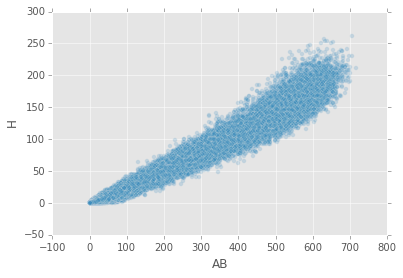

In [32]:
_ = pandas_df.plot(kind='scatter', x='AB', y='H', alpha=.2) 

# Getting Help 

It is often useful to look at docstrings for functions that you are not familiar with:

In [33]:
?join

Your second place to look is the [documentation](http://blaze.pydata.org/). If you are still stuck, you can post a question on Stack Overflow using the `Blaze` tag.

If you find a bug, you should look at the [issue tracker](https://github.com/ContinuumIO/blaze/issues) and search if the bug has already been reported. If the bug has not yet been reported, we encourage you to submit a new issue. 

# Gotchas

- Not all operations are available on all backends. For example, slicing with steps (e.g., `[1:100:2]` is not possible with SQL backends.

#  Tips

- It is not possible to change a dataset when using a `Data` object. When changing data is necessary, use `odo` to transform the data into a database or array technology of your choice (Pandas DataFrame, HDFS). See the `odo` [documentation](https://odo.readthedocs.org/en/latest/) for more information.

# References

This tutorial was heavily influenced by [10 minutes to Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html).